## 1024 Homework by Jiyun Tsai
**Note**  
- During the data cleaning process, I haven't delete rows that have wrong 'Execute_Time' which are the ones less than 0 days. Will filter out if necessary during the following process.
- Haven't clean data in 'COUNCILDISTRICT' (joint categories) Will do so if necessary during the following process.

In [2]:
import pandas as pd
import altair as alt ## anaconda needs to install it via environment (do not use root(base) cuz it might crash)
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [3]:
oakland_311 = pd.read_csv('oakland_311_clean.csv', ## make sure it's the correct directory
    dtype={
        'REQUESTID': object,
    },
    parse_dates=['DATETIMEINIT', 'DATETIMECLOSED', 'Execute_Time']
)

In [4]:
oakland_311.head() ## shows the head 5 rows

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,REQADDRESS,STATUS,REFERREDTO,DATETIMECLOSED,SRX,SRY,COUNCILDISTRICT,BEAT,PROBADDRESS,City,State,Execute_Time
0,1177440,2022-01-11 09:54:54,Phone or Email,Tree - Down,TREES,NaN,WOCREATE,NaN,NaT,NaN,NaN,NaN,02Y,McCRAE POND,Oakland,CA,NaN
1,1236100,2022-09-04 23:14:03,SeeClickFix,Hazardous Materials,FIRE,"(37.79110003129922, -122.22179990095928)",OPEN,NaN,NaT,6064165.540,2115096.007,CCD5,21X,E 27TH ST & BARRY PL,Oakland,CA,NaN
2,1236280,2022-09-06 09:52:30,Phone,Sidewalk - Damage,ROW_STREETSW,"(37.77609653732435, -122.1972178270711)",OPEN,NaN,NaT,6071168.490,2109504.060,CCD6,28X,2600 COLE ST,Oakland,CA,NaN
3,1237256,2022-09-09 12:18:50,SeeClickFix,Tree - Pruning,TREES,"(37.77617202897651, -122.18976602952326)",UNFUNDED,NaN,NaT,6073322.331,2109492.573,CCD6,29X,2901 56TH AVE,Oakland,CA,NaN
4,1238127,2022-09-12 23:02:06,SeeClickFix,Parking - Enforcement,PARKING,"(37.764640839375126, -122.20173973510026)",EVALUATED - NO FURTHER ACTION,NaN,NaT,6069785.951,2105357.222,CCD6,26Y,1291 58TH AVE,Oakland,CA,NaN


In [5]:
oakland_311.info() ## there are 942318 rows by Oct.30, 2022
                   ## the 'REQUESTID' has now changed to object (not numbers)
                   ## Time Dtype are correctedly imported except 'Execute_Time'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947475 entries, 0 to 947474
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   REQUESTID        947475 non-null  object        
 1   DATETIMEINIT     947475 non-null  datetime64[ns]
 2   SOURCE           947475 non-null  object        
 3   DESCRIPTION      947475 non-null  object        
 4   REQCATEGORY      947386 non-null  object        
 5   REQADDRESS       929892 non-null  object        
 6   STATUS           947473 non-null  object        
 7   REFERREDTO       84938 non-null   object        
 8   DATETIMECLOSED   683200 non-null  datetime64[ns]
 9   SRX              929892 non-null  float64       
 10  SRY              929892 non-null  float64       
 11  COUNCILDISTRICT  902508 non-null  object        
 12  BEAT             905241 non-null  object        
 13  PROBADDRESS      947023 non-null  object        
 14  City             947

In [6]:
oakland_311['Execute_Time'] = pd.to_timedelta(oakland_311['Execute_Time']) ## format 'Close_Time' to timedelta64

In [7]:
oakland_311

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,REQADDRESS,STATUS,REFERREDTO,DATETIMECLOSED,SRX,SRY,COUNCILDISTRICT,BEAT,PROBADDRESS,City,State,Execute_Time
0,1177440,2022-01-11 09:54:54,Phone or Email,Tree - Down,TREES,NaN,WOCREATE,NaN,NaT,NaN,NaN,NaN,02Y,McCRAE POND,Oakland,CA,NaT
1,1236100,2022-09-04 23:14:03,SeeClickFix,Hazardous Materials,FIRE,"(37.79110003129922, -122.22179990095928)",OPEN,NaN,NaT,6064165.540,2115096.007,CCD5,21X,E 27TH ST & BARRY PL,Oakland,CA,NaT
2,1236280,2022-09-06 09:52:30,Phone,Sidewalk - Damage,ROW_STREETSW,"(37.77609653732435, -122.1972178270711)",OPEN,NaN,NaT,6071168.490,2109504.060,CCD6,28X,2600 COLE ST,Oakland,CA,NaT
3,1237256,2022-09-09 12:18:50,SeeClickFix,Tree - Pruning,TREES,"(37.77617202897651, -122.18976602952326)",UNFUNDED,NaN,NaT,6073322.331,2109492.573,CCD6,29X,2901 56TH AVE,Oakland,CA,NaT
4,1238127,2022-09-12 23:02:06,SeeClickFix,Parking - Enforcement,PARKING,"(37.764640839375126, -122.20173973510026)",EVALUATED - NO FURTHER ACTION,NaN,NaT,6069785.951,2105357.222,CCD6,26Y,1291 58TH AVE,Oakland,CA,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947470,992269,2020-03-03 08:13:59,Email,"Illegal Dumping - debris, appliances, etc.",ILLDUMP,"(37.768215040818085, -122.19858681924846)",CLOSED,NaN,2020-03-04 22:08:26,6070720.808,2106641.892,CCD6,27Y,57TH AVE & SCOVILLE ST,Oakland,CA,1 days 13:54:27
947471,998818,2020-03-30 11:30:19,SeeClickFix,"Graffiti on a City Building (Library, Rec Center)",BLDGMAINT,"(37.81143000137956, -122.26130549877647)",CLOSED,NaN,2020-04-10 11:10:45,6052891.339,2122709.727,CCD3,14X,VETERANS MEMORIAL BLDG DOWNTOWN SENIOR CENTER,Oakland,CA,10 days 23:40:26
947472,998739,2020-03-30 08:56:33,SeeClickFix,Litter - Street Litter Container - Overflowing...,ILLDUMP,"(37.82441723346091, -122.25230276622392)",CANCEL,NaN,NaT,6055580.128,2127389.044,CCD1,09X,102 MONTE VISTA AVE,Oakland,CA,NaT
947473,994068,2020-03-09 09:47:47,SeeClickFix,"Illegal Dumping - debris, appliances, etc.",ILLDUMP,"(37.773025041459675, -122.18271682376431)",CLOSED,NaN,2020-03-10 20:19:03,6075338.737,2108310.166,CCD6,29X,CAMDEN ST & 63RD AVE,Oakland,CA,1 days 10:31:16


## Explore the data

### Categories of incidents in 2021

In [8]:
# Create a new df oakland_311_2021 that filters the data in 2021 specifically 
oakland_311_2021 = oakland_311[
    (oakland_311['DATETIMEINIT'] >= '2021-01-01') &
    (oakland_311['DATETIMEINIT'] < '2022-01-01') & ## using 2022-01-01 to include all times in 2021-12-31
    (oakland_311['Execute_Time'] >= '0 days') ## filter out wrong 'Execute_Time' (no wrong 'Execute_Time') in 2021 
].reset_index(drop=True)

In [9]:
oakland_311_2021

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,REQADDRESS,STATUS,REFERREDTO,DATETIMECLOSED,SRX,SRY,COUNCILDISTRICT,BEAT,PROBADDRESS,City,State,Execute_Time
0,1100745,2021-03-30 12:32:58,Phone,Sidewalk - Damage,ROW_STREETSW,"(37.799530131704586, -122.27422629538978)",CLOSED,NaN,2022-10-24 12:43:27,6049077.307,2118447.988,CCD3,03Y,701 BROADWAY,Oakland,CA,573 days 00:10:29
1,1130459,2021-07-16 10:59:26,Email,Homeless Encampment - Living in Vehicle,HE_CLEAN,"(37.81298016737627, -122.27854491902883)",CLOSED,NaN,2022-10-20 16:06:57,6047922.838,2123368.258,CCD3,05X,878 21ST ST,Oakland,CA,461 days 05:07:31
2,1163133,2021-11-09 13:33:22,Phone,Street Light - Outage/Damaged,BLDGMAINT,"(37.79682229778846, -122.25993729287025)",CLOSED,NaN,2022-10-24 07:17:55,6053186.494,2117384.229,CCD2,03X,PERALTA PARK,Oakland,CA,348 days 17:44:33
3,1152661,2021-10-04 08:27:43,Email,Streets - Potholes/Depression,SEWERS,"(37.77903411050023, -122.20076947812393)",CLOSED,NaN,2022-10-24 08:57:47,6070161.609,2110592.151,CCD4,27X,2550 RENWICK ST,Oakland,CA,385 days 00:30:04
4,1170173,2021-12-10 08:44:23,SeeClickFix,Parking - Abandoned Vehicle,POLICE,"(37.83181839825774, -122.25000389602818)",CLOSED,"PARKING, PCT_Not-NoN",2022-10-25 09:44:06,6056294.384,2130071.097,CCD1,09X,4454 VIEW ST,Oakland,CA,319 days 00:59:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68584,1174669,2021-12-30 13:18:42,SeeClickFix,"Illegal Dumping - debris, appliances, etc.",ILLDUMP,"(37.77450504361902, -122.2337168108031)",CLOSED,NaN,2022-01-05 19:31:35,6060610.695,2109118.018,CCD5,20X,E 7TH ST & 29TH AVE,Oakland,CA,6 days 06:12:53
68585,1173271,2021-12-23 10:14:44,Phone,Storm Drains - Clogged (Flooding),DRAINAGE,"(37.725543176497, -122.1994049027011)",CLOSED,NaN,2021-12-28 10:23:28,6070202.250,2091111.090,CCD7,31X,10001 DOOLITTLE DR,Oakland,CA,5 days 00:08:44
68586,1173749,2021-12-26 13:01:18,SeeClickFix,"Illegal Dumping - debris, appliances, etc.",ILLDUMP,"(37.73325718651639, -122.18051912277116)",CLOSED,NaN,2021-12-28 19:53:23,6075713.824,2093820.822,CCD7,31Y,10220 CARY AVE,Oakland,CA,2 days 06:52:05
68587,1172964,2021-12-22 08:22:30,Phone,City Bldg - Appliance Issue,BLDGMAINT,"(37.822957487044704, -122.28478363241148)",CLOSED,NaN,2021-12-24 07:42:59,6046190.246,2127034.888,CCD3,07X,WILLIE KEYES (POPLAR) RECREATION CTR,Oakland,CA,1 days 23:20:29


In [10]:
oakland_311_2021.info() ## there are 68513 incidents reported in 2021

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68589 entries, 0 to 68588
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   REQUESTID        68589 non-null  object         
 1   DATETIMEINIT     68589 non-null  datetime64[ns] 
 2   SOURCE           68589 non-null  object         
 3   DESCRIPTION      68589 non-null  object         
 4   REQCATEGORY      68588 non-null  object         
 5   REQADDRESS       66820 non-null  object         
 6   STATUS           68589 non-null  object         
 7   REFERREDTO       3196 non-null   object         
 8   DATETIMECLOSED   68589 non-null  datetime64[ns] 
 9   SRX              66820 non-null  float64        
 10  SRY              66820 non-null  float64        
 11  COUNCILDISTRICT  65715 non-null  object         
 12  BEAT             66161 non-null  object         
 13  PROBADDRESS      68584 non-null  object         
 14  City             68589

### Take a look at 'REQCATEGORY'

In [11]:
oakland_311_2021['REQCATEGORY'].unique() ## note that there is a NaN value in 'REQCATEGORY'

array(['ROW_STREETSW', 'HE_CLEAN', 'BLDGMAINT', 'SEWERS', 'POLICE',
       'PARKS', 'ELECTRICAL', 'TREES', 'DRAINAGE', 'STREETSW',
       'TRAFFIC_ENGIN', 'PARKING', 'OTHER', 'RECYCLING', 'KOCB',
       'ILLDUMP', 'TRAFFIC', 'GRAFFITI', 'METER_REPAIR', 'CUT_CLEAN',
       'FIRE', 'ENVIRON_ENF', 'ROW_INSPECTORS', 'WATERSHED', 'CW_DIT_GIS',
       'FACILITIES', nan], dtype=object)

In [12]:
oakland_311_2021[oakland_311_2021['REQCATEGORY'].isna()] ## find the row with NaN in 'REQCATEGORY'

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,REQADDRESS,STATUS,REFERREDTO,DATETIMECLOSED,SRX,SRY,COUNCILDISTRICT,BEAT,PROBADDRESS,City,State,Execute_Time
65843,1160684,2021-11-01 12:26:31,SeeClickFix,City Bldg - Electrical Inside/Outside,NaN,"(37.806785124014034, -122.25660743897231)",CLOSED,NaN,2021-11-17 14:59:46,6054216.529,2120993.209,NaN,NaN,NaN,Oakland,CA,16 days 02:33:15


In [13]:
# Aggregate 'REQCATEGORY' 
oakland_311_2021.groupby(['REQCATEGORY']).count() ## if you only want to know the count of each category,
                                                  ## use: oakland_311_2021['REQCATEGORY'].value_counts()

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQADDRESS,STATUS,REFERREDTO,DATETIMECLOSED,SRX,SRY,COUNCILDISTRICT,BEAT,PROBADDRESS,City,State,Execute_Time
REQCATEGORY,,,,,,,,,,,,,,,,
BLDGMAINT,4471,4471,4471,4471,4351,4471,27,4471,4351,4351,4254,4289,4470,4471,4471,4471
CUT_CLEAN,277,277,277,277,273,277,2,277,273,273,270,273,277,277,277,277
CW_DIT_GIS,24,24,24,24,2,24,0,24,2,2,2,2,24,24,24,24
DRAINAGE,1494,1494,1494,1494,1426,1494,309,1494,1426,1426,1403,1413,1494,1494,1494,1494
ELECTRICAL,2567,2567,2567,2567,2359,2567,480,2567,2359,2359,2313,2324,2567,2567,2567,2567
ENVIRON_ENF,213,213,213,213,210,213,0,213,210,210,208,208,213,213,213,213
FACILITIES,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3,3
FIRE,11,11,11,11,11,11,0,11,11,11,11,11,11,11,11,11
GRAFFITI,2684,2684,2684,2684,2680,2684,65,2684,2680,2680,2620,2634,2684,2684,2684,2684


In [14]:
# Count only by 'REQUESTID'
category_counts_2021 = oakland_311_2021.groupby(['REQCATEGORY']).count()
category_counts_2021 = category_counts_2021[['REQUESTID']].copy()
category_counts_2021

,REQUESTID
REQCATEGORY,
BLDGMAINT,4471
CUT_CLEAN,277
CW_DIT_GIS,24
DRAINAGE,1494
ELECTRICAL,2567
ENVIRON_ENF,213
FACILITIES,3
FIRE,11
GRAFFITI,2684


In [15]:
# Create new column for this index
category_counts_2021 = category_counts_2021.reset_index()
category_counts_2021

,REQCATEGORY,REQUESTID
0,BLDGMAINT,4471
1,CUT_CLEAN,277
2,CW_DIT_GIS,24
3,DRAINAGE,1494
4,ELECTRICAL,2567
5,ENVIRON_ENF,213
6,FACILITIES,3
7,FIRE,11
8,GRAFFITI,2684
9,HE_CLEAN,131


In [16]:
# Rename 'REQUESTID' in this column
category_counts_2021.rename(columns={'REQUESTID': 'Case_Count'}, inplace=True)
category_counts_2021

,REQCATEGORY,Case_Count
0,BLDGMAINT,4471
1,CUT_CLEAN,277
2,CW_DIT_GIS,24
3,DRAINAGE,1494
4,ELECTRICAL,2567
5,ENVIRON_ENF,213
6,FACILITIES,3
7,FIRE,11
8,GRAFFITI,2684
9,HE_CLEAN,131


In [17]:
# Sort the column with incidents from the most to the least
category_counts_2021 = category_counts_2021.sort_values(by=['Case_Count'], ascending=False).copy()
category_counts_2021

,REQCATEGORY,Case_Count
10,ILLDUMP,30241
16,POLICE,15034
0,BLDGMAINT,4471
8,GRAFFITI,2684
4,ELECTRICAL,2567
17,RECYCLING,2096
24,TREES,1820
22,TRAFFIC,1619
3,DRAINAGE,1494
21,STREETSW,1468


### Visualized the data

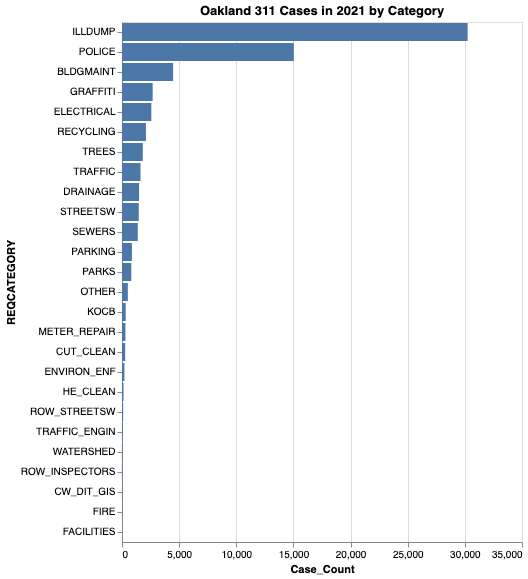

In [18]:
# Make bar chart with altair
alt.Chart(category_counts_2021).mark_bar().encode(
    x='Case_Count',
    y=alt.Y('REQCATEGORY', sort='-x')
).properties(
    title='Oakland 311 Cases in 2021 by Category'
)

### Count 5 Year Incident Data from 2017 - 2021

In [19]:
# Create new df named oakland_311_5y
oakland_311_5y = oakland_311[
    (oakland_311['DATETIMEINIT'] >= '2017-01-01') &
    (oakland_311['DATETIMEINIT'] < '2022-01-01') &
    (oakland_311['Execute_Time'] >= '0 days') ## filter out wrong 'Execute_Time'
].reset_index(drop=True)
oakland_311_5y

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,REQADDRESS,STATUS,REFERREDTO,DATETIMECLOSED,SRX,SRY,COUNCILDISTRICT,BEAT,PROBADDRESS,City,State,Execute_Time
0,1006268,2020-05-01 15:19:36,Email,Construction and Demolition Recycling,RECYCLING,NaN,CLOSED,NaN,2020-05-01 15:20:08,NaN,NaN,NaN,NaN,ZZ,Oakland,CA,0 days 00:00:32
1,1006717,2020-05-04 09:35:25,Phone or Email,Board Up,DRAINAGE,NaN,CLOSED,NaN,2020-05-05 10:21:33,NaN,NaN,NaN,NaN,11089 Golf links,Oakland,CA,1 days 00:46:08
2,1007414,2020-05-06 09:46:43,Phone,"Illegal Dumping - debris, appliances, etc.",ILLDUMP,NaN,CLOSED,NaN,2020-07-22 10:28:03,NaN,NaN,NaN,NaN,3001 SAN PABLO AV,Oakland,CA,77 days 00:41:20
3,1007537,2020-05-06 14:04:20,Phone,COVID-19 Question,OTHER,"(37.772414111504105, -122.18612161475122)",CLOSED,NaN,2020-05-06 14:04:34,6074350.805,2108105.461,CCD6,29X,2936 61ST AV,Oakland,CA,0 days 00:00:14
4,1007934,2020-05-07 16:35:13,Phone,"Illegal Dumping - debris, appliances, etc.",ILLDUMP,NaN,CLOSED,NaN,2020-05-11 18:14:51,NaN,NaN,NaN,NaN,650 53RD STREET,Oakland,CA,4 days 01:39:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326023,999454,2020-04-02 09:08:26,SeeClickFix,"Illegal Dumping - debris, appliances, etc.",ILLDUMP,"(37.84259189198031, -122.25164877817319)",CLOSED,NaN,2020-04-03 16:59:23,6055892.846,2134002.200,CCD1,12Y,5505 COLLEGE AV,Oakland,CA,1 days 07:50:57
326024,992269,2020-03-03 08:13:59,Email,"Illegal Dumping - debris, appliances, etc.",ILLDUMP,"(37.768215040818085, -122.19858681924846)",CLOSED,NaN,2020-03-04 22:08:26,6070720.808,2106641.892,CCD6,27Y,57TH AVE & SCOVILLE ST,Oakland,CA,1 days 13:54:27
326025,998818,2020-03-30 11:30:19,SeeClickFix,"Graffiti on a City Building (Library, Rec Center)",BLDGMAINT,"(37.81143000137956, -122.26130549877647)",CLOSED,NaN,2020-04-10 11:10:45,6052891.339,2122709.727,CCD3,14X,VETERANS MEMORIAL BLDG DOWNTOWN SENIOR CENTER,Oakland,CA,10 days 23:40:26
326026,994068,2020-03-09 09:47:47,SeeClickFix,"Illegal Dumping - debris, appliances, etc.",ILLDUMP,"(37.773025041459675, -122.18271682376431)",CLOSED,NaN,2020-03-10 20:19:03,6075338.737,2108310.166,CCD6,29X,CAMDEN ST & 63RD AVE,Oakland,CA,1 days 10:31:16


In [20]:
oakland_311_5y.info() ## there are 325898 incidents reported from 2017-2021

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326028 entries, 0 to 326027
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   REQUESTID        326028 non-null  object         
 1   DATETIMEINIT     326028 non-null  datetime64[ns] 
 2   SOURCE           326028 non-null  object         
 3   DESCRIPTION      326028 non-null  object         
 4   REQCATEGORY      326018 non-null  object         
 5   REQADDRESS       320185 non-null  object         
 6   STATUS           326028 non-null  object         
 7   REFERREDTO       3998 non-null    object         
 8   DATETIMECLOSED   326028 non-null  datetime64[ns] 
 9   SRX              320185 non-null  float64        
 10  SRY              320185 non-null  float64        
 11  COUNCILDISTRICT  317012 non-null  object         
 12  BEAT             318362 non-null  object         
 13  PROBADDRESS      325993 non-null  object         
 14  City

In [21]:
fiveyear_cases = oakland_311_5y.groupby([pd.Grouper(key='DATETIMEINIT', axis=0, freq='A')]).count()
fiveyear_cases

,REQUESTID,SOURCE,DESCRIPTION,REQCATEGORY,REQADDRESS,STATUS,REFERREDTO,DATETIMECLOSED,SRX,SRY,COUNCILDISTRICT,BEAT,PROBADDRESS,City,State,Execute_Time
DATETIMEINIT,,,,,,,,,,,,,,,,
2017-12-31,53181,53181,53181,53181,51926,53181,220,53181,51926,51926,51429,51561,53180,53181,53181,53181
2018-12-31,50342,50342,50342,50337,49628,50342,80,50342,49628,49628,49371,49527,50328,50342,50342,50342
2019-12-31,77851,77851,77851,77848,76804,77851,195,77851,76804,76804,75809,76133,77840,77851,77851,77851
2020-12-31,76065,76065,76065,76064,75007,76065,307,76065,75007,75007,74688,74980,76061,76065,76065,76065
2021-12-31,68589,68589,68589,68588,66820,68589,3196,68589,66820,66820,65715,66161,68584,68589,68589,68589


In [22]:
# Count only by 'REQUESTID'
fiveyear_cases = fiveyear_cases[['REQUESTID']].reset_index()
fiveyear_cases

,DATETIMEINIT,REQUESTID
0,2017-12-31,53181
1,2018-12-31,50342
2,2019-12-31,77851
3,2020-12-31,76065
4,2021-12-31,68589


In [23]:
# Rename the column
fiveyear_cases.rename(columns={'REQUESTID': 'Case_Count'}, inplace=True)
fiveyear_cases

,DATETIMEINIT,Case_Count
0,2017-12-31,53181
1,2018-12-31,50342
2,2019-12-31,77851
3,2020-12-31,76065
4,2021-12-31,68589


In [24]:
# Create new column for Year
fiveyear_cases['Year'] = fiveyear_cases['DATETIMEINIT'].dt.year
fiveyear_cases

,DATETIMEINIT,Case_Count,Year
0,2017-12-31,53181,2017
1,2018-12-31,50342,2018
2,2019-12-31,77851,2019
3,2020-12-31,76065,2020
4,2021-12-31,68589,2021


In [25]:
fiveyear_cases = fiveyear_cases[['Year', 'Case_Count']].copy()
fiveyear_cases

,Year,Case_Count
0,2017,53181
1,2018,50342
2,2019,77851
3,2020,76065
4,2021,68589


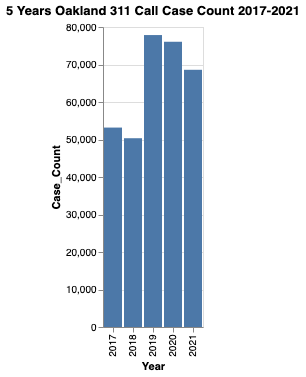

In [26]:
# Visualize
alt.Chart(fiveyear_cases).mark_bar().encode(
    x='Year:O',
    y='Case_Count'
).properties(
    title='5 Years Oakland 311 Call Case Count 2017-2021'
)